In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [31]:
d = {}
(1) in [t[0] for t in d.keys()]
1[1]

TypeError: 'int' object is not subscriptable

In [2]:
%%time

from statistics import mean

score_pc_all = []
score_pec_all = []
score_calinski_all = []
score_davies_all = []
    

# load raw data matrix
eight_smpl_cropped_norm = np.load('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samp_cropped_norm.npy')
vec_to_cluster = np.reshape(eight_smpl_cropped_norm, newshape=(eight_smpl_cropped_norm.shape[0] * eight_smpl_cropped_norm.shape[1] * eight_smpl_cropped_norm.shape[2] * eight_smpl_cropped_norm.shape[3], eight_smpl_cropped_norm.shape[4]))

for k in range(2,11):
    print("K = ", k)
    # load a model
    work_dir = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_6channels_labels/FCM_{}_means/'.format(k)
    with open(os.path.join(work_dir,"FCM_K{}_8_samples_model.pkl".format(k)), "rb") as f:
        fcm = pickle.load(f)    

    # load the predicted labels
    labels_mat = np.load(os.path.join(work_dir, 'labels_mask_6ch.npy'))
    pred = np.reshape(labels_mat, newshape=(eight_smpl_cropped_norm.shape[0] * eight_smpl_cropped_norm.shape[1] * eight_smpl_cropped_norm.shape[2] * eight_smpl_cropped_norm.shape[3]))

    
        
    # get scores of the model
    score_pc_all.append(fcm.partition_coefficient)
    score_pec_all.append(fcm.partition_entropy_coefficient)

    

    score_clinski_slices = []
    score_davies_slices = []
    for i in range(186):
        
        slc_orig = eight_smpl_cropped_norm[:, i, :, :, :]
        slc_orig_vec = np.reshape(slc_orig, newshape=(slc_orig.shape[0] * 
                                                      slc_orig.shape[1] * 
                                                      slc_orig.shape[2], slc_orig.shape[3]))
        
        slc_pred = labels_mat[:, i, :, :]
        slc_pred_vec = np.reshape(slc_pred, newshape=(slc_pred.shape[0] * 
                                                      slc_orig.shape[1] * 
                                                      slc_orig.shape[2]))
    
        # get calinski_harabasz_score and davies_bouldin_scoreof the model    
        score_clinski_slices.append(calinski_harabasz_score(slc_orig_vec, slc_pred_vec))
        score_davies_slices.append(davies_bouldin_score(slc_orig_vec, slc_pred_vec))
    
    score_calinski_all.append(mean(score_clinski_slices))
    score_davies_all.append(mean(score_davies_slices))
print("Finished")

K =  2
K =  3
K =  4
K =  5
K =  6
K =  7
K =  8
K =  9
K =  10
Finished
CPU times: user 10min 31s, sys: 14min 8s, total: 24min 39s
Wall time: 8min 12s


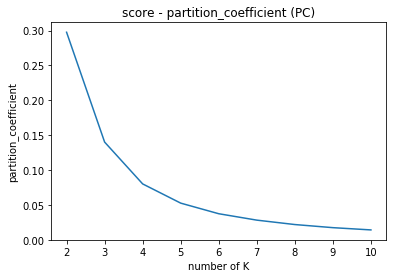

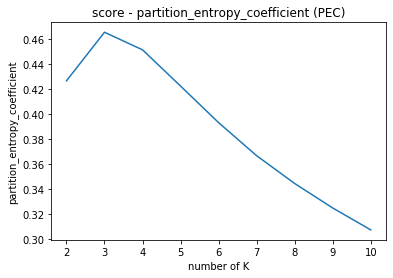

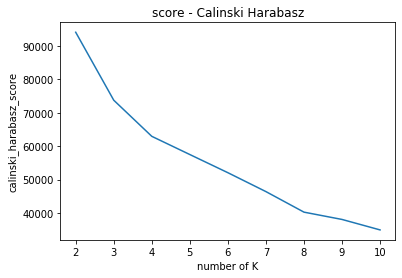

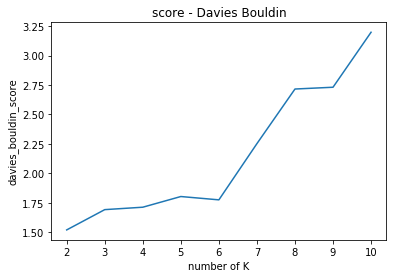

In [3]:
#### PLOT SCORES AS FUNCTION OF K
# PC score
plt.plot(score_pc_all)
plt.xticks(range(len(score_pc_all)), labels=range(2,11))
plt.xlabel("number of K")
plt.ylabel("partition_coefficient")
plt.title("score - partition_coefficient (PC)")
plt.savefig("pc_score.png")
plt.show()

# PEC score
plt.plot(score_pec_all)
plt.xticks(range(len(score_pc_all)), labels=range(2,11))
plt.xlabel("number of K")
plt.ylabel("partition_entropy_coefficient")
plt.title("score - partition_entropy_coefficient (PEC)")
plt.savefig("pec_score.png")
plt.show()

plt.plot(score_calinski_all)
plt.xticks(range(len(score_pc_all)), labels=range(2,11))
plt.xlabel("number of K")
plt.ylabel("calinski_harabasz_score")
plt.title("score - Calinski Harabasz")
plt.savefig("calinski_score.png")
plt.show()

plt.plot(score_davies_all)
plt.xticks(range(len(score_pc_all)), labels=range(2,11))
plt.xlabel("number of K")
plt.ylabel("davies_bouldin_score")
plt.title("score - Davies Bouldin")
plt.savefig("davies_score.png")
plt.show()